<a href="https://colab.research.google.com/github/nayeem990/Competitive_Python/blob/master/linear_and_logistic_regression_using_sklearn_tf_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score

In [0]:
boston = load_boston()
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [0]:
x=boston.data

In [0]:
y=boston.target

In [0]:
xtrain,xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=42)

xtrain.shape

(354, 13)

In [0]:
ytrain.shape

(354,)

In [0]:
ytest.shape

(152,)

In [0]:
xtest.shape

(152, 13)

In [0]:
model = LinearRegression()
model.fit(xtrain,ytrain)
print("Coefficients : ", model.coef_)

Coefficients :  [-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]


In [0]:
print("Variance score : {}".format(model.score(xtest,ytest)))

Variance score : 0.7112260057484974


In [0]:
result = model.predict(xtest)
result

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

In [0]:
explained_variance_score(ytest,result)

0.7113071046466934

In [0]:
plt.style.use('fivethirtyeight')

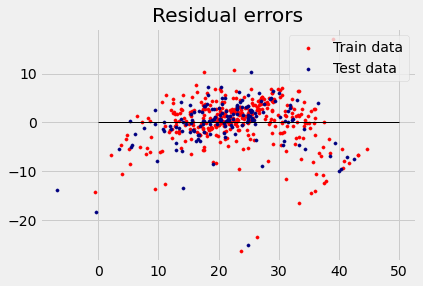

In [0]:
plt.scatter(model.predict(xtrain),model.predict(xtrain)-ytrain,
            color = "red", s = 10, label = 'Train data')
plt.scatter(model.predict(xtest), model.predict(xtest)-ytest,color = "navy", s = 10, label = 'Test data')

plt.hlines(y=0, xmin=0,xmax=50, linewidth=1)
plt.legend(loc='upper right')
plt.title('Residual errors')
plt.show()

### Little or no multi-collinearity:

 It is assumed that there is little or no multicollinearity in the data. Multicollinearity occurs when the features (or independent variables) are not independent from each other.

### Little or no auto-correlation:

 Another assumption is that there is little or no autocorrelation in the data. Autocorrelation occurs when the residual errors are not independent from each other. You can refer here for more insight into this topic.

### Homoscedasticity: 

Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables. As shown below, figure 1 has homoscedasticity while figure 2 has heteroscedasticity.

Tensorflow creates a Directed Acyclic Graph or DAG which keeps track of all the computations, and then executes all the computations done inside a Tensorflow Session.


All we need to do is estimate the value of w and b from the given set of data such that the resultant hypothesis produces the least cost J which is defined by the following cost function
 J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (y_i - h(x_i)) ^ 2 
where m is the number of data points in the given dataset. This cost function is also called Mean Squared Error.

For finding the optimized value of the parameters for which J is minimum, we will be using a commonly used optimizer algorithm called Gradient Descent. Following is the pseudo-code for Gradient Descent:

Repeat untill Convergence {
    
    w = w - α * δJ/δw

    b = b - α * δJ/δb
}


# Linear Regression using tensorflow 

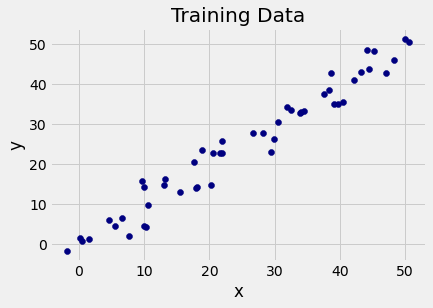

In [0]:
#importing the required modules for prediction model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


#setting random seed for both numpy and tensorflow
np.random.seed(101)

x = np.linspace(0,50,50)
y = np.linspace(0,50,50)
x+=np.random.uniform(-4,4,50)
y+=np.random.uniform(-4,4,50)


#plotting and visualization
plt.scatter(x,y,color='navy')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training Data")
plt.show()

# logistic regression

In [77]:
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split

#get the dataset and store inside x and y
digits = datasets.load_digits()
x = digits.data
y = digits.target

#spliting the datasets
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.3, random_state=42)

#creating the model
model = linear_model.LogisticRegression()
model.fit(xtrain,ytrain)

#predicting the value
pred = model.predict(xtest)
print("Logistics regression model accuray(in %): {0:.2f}".format(metrics.accuracy_score(ytest,pred)*100),"%")

Logistics regression model accuray(in %): 96.48 %


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


At last, here are some points about Logistic regression to ponder upon:

Does NOT assume a linear relationship between the dependent variable and the independent variables, but it does assume linear relationship between the logit of the explanatory variables and the response.
Independent variables can be even the power terms or some other nonlinear transformations of the original independent variables.
The dependent variable does NOT need to be normally distributed, but it typically assumes a distribution from an exponential family (e.g. binomial, Poisson, multinomial, normal,…); binary logistic regression assume binomial distribution of the response.
The homogeneity of variance does NOT need to be satisfied.
Errors need to be independent but NOT normally distributed.
It uses maximum likelihood estimation (MLE) rather than ordinary least squares (OLS) to estimate the parameters, and thus relies on large-sample approximations.